In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import io

In [2]:
csvs = os.listdir('res')
buff = io.StringIO()
for n, c in enumerate(csvs):
    with open(f'res/{c}') as f:
        if buff.tell():
            try:
                f.readline()
            except:
                continue
        buff.write(f.read())
buff.seek(0)
df = pd.read_csv(buff)

In [3]:
df.columns

Index(['Seed', 'Total Number of Trials', 'Training Batch Size',
       'KL Batch Size', 'x Sequence Length', 'x Vector Length', 'p_1', 'p_2',
       'x Standard Deviation', 'theta_3 Standard Deviation', 'Learning Rate',
       'LR Reduction Patience', 'LR Reduction Threshold',
       'LR Reduction Factor', 'Estimator', 'Optimizer',
       'Number of Monte Carlo Samples', 'Trial', 'SSE theta_1', 'SSE theta_2',
       'SSE theta_3', 'Time Since Start', 'zhat Estimate', 'Log ESS',
       'KL Batch Estimate'],
      dtype='object')

KeyboardInterrupt: 

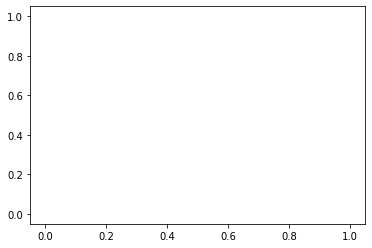

In [6]:
df_ = df[(df['p_2'] == 0.0) & (df['Number of Monte Carlo Samples'] == 1)]
sns.lineplot(x='Trial', y='KL Batch Estimate', hue='Estimator', data=df_)

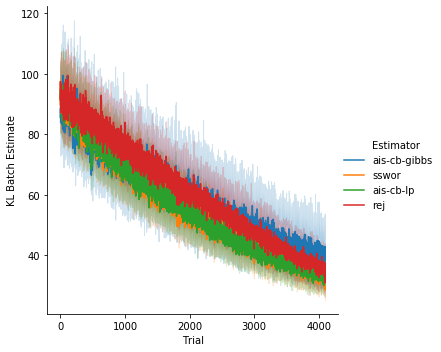

In [6]:
df_ = df[(df['p_2'] == 0.25) & (df['Number of Monte Carlo Samples'] == 256)]
sns.lineplot(x='Trial', y='KL Batch Estimate', hue='Estimator', data=df_)

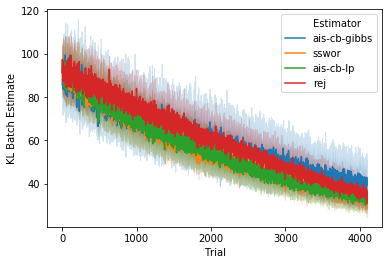

In [24]:
df_ = df[(df['beta'] == 0.75) & (df['Number of Monte Carlo Samples'] == 256)]
sns.lineplot(x='Trial', y='KL Batch Estimate', hue='Estimator', data=df_)

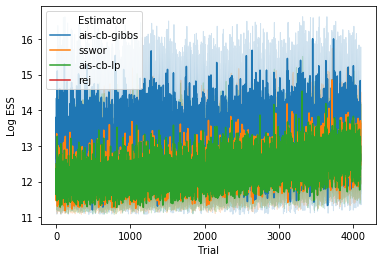

In [20]:
df_ = df[(df['beta'] == 0.75) & (df['Number of Monte Carlo Samples'] == 256)]
sns.lineplot(x='Trial', y='Log ESS', hue='Estimator', data=df_)

In [10]:
df[df['Number of Monte Carlo Samples'] > 1].groupby(['Number of Monte Carlo Samples', 'Estimator', 'p_1', 'p_2'])['Log ESS'].describe()

count       mean  \
Number of Monte Carlo Samples Estimator    p_1  p_2                         
256                           ais-cb-count 0.25 0.00   36864.0  11.302779   
                                                0.25   36864.0  11.314773   
                                                0.75   45056.0  11.605487   
                                           0.75 0.00   24576.0  11.370305   
                                                0.25   20480.0  11.372968   
                                                0.75   20480.0  11.414883   
                              ais-cb-gibbs 0.25 0.00   12288.0  11.875645   
                                                0.25   12288.0  11.911488   
                                                0.75   16384.0  12.395931   
                                           0.75 0.00    8192.0  11.383313   
                                                0.25    8192.0  11.379261   
                                                0.75    8192.0  11.397835   
                              ais-cb-lp    0.25 0.00   32768.0  12.378202   
                                                0.25   32768.0  12.418613   
                                                0.75   40960.0  12.586251   
                                           0.75 0.00   20480.0  11.389999   
                                                0.25   16384.0  11.384253   
                                                0.75   24576.0  11.334089   
                              rej          0.25 0.00       0.0        NaN   
                                                0.25       0.0        NaN   
                                                0.75       0.0        NaN   
                                           0.75 0.00       0.0        NaN   
                                                0.25       0.0        NaN   
                                                0.75       0.0        NaN   
                              srswor       0.25 0.00  409600.0  12.370515   
                                                0.25  409600.0  12.394632   
                                                0.75  409600.0  12.596059   
                                           0.75 0.00  409600.0  11.386713   
                                                0.25  409600.0  11.385007   
                                                0.75  409600.0  11.331117   
65536                         rej          0.25 0.00       0.0        NaN   
                                                0.25       0.0        NaN   
                                                0.75       0.0        NaN   
                                           0.75 0.00       0.0        NaN   
                                                0.25       0.0        NaN   
                                                0.75       0.0        NaN   
                              srswor       0.25 0.25   12288.0  24.104154   
                                                0.75   24576.0  24.803740   
                                           0.75 0.00   12288.0  22.510155   
                                                0.25   12288.0  22.514575   
                                                0.75   16384.0  22.512331   

                                                           std        min  \
Number of Monte Carlo Samples Estimator    p_1  p_2                         
256                           ais-cb-count 0.25 0.00  0.330016  11.090355   
                                                0.25  0.345290  11.090355   
                                                0.75  0.655750  11.090355   
                                           0.75 0.00  0.370521  11.090355   
                                                0.25  0.374465  11.090355   
                                                0.75  0.430692  11.090355   
                              ais-cb-gibbs 0.25 0.00  0.581173  11.090355   
                                                0.25

In [11]:
df[(df['Trial'] == df['Total Number of Trials']) & (df[''])].groupby(['Number of Monte Carlo Samples', 'Estimator', 'p_1', 'p_2'])['KL Batch Estimate'].describe()

count        mean  \
Number of Monte Carlo Samples Estimator    p_1  p_2                       
1                             ais-cb-count 0.25 0.00  100.0   57.697484   
                                                0.25  100.0   57.658462   
                                                0.75  100.0   57.177844   
                                           0.75 0.00  100.0  145.040371   
                                                0.25  100.0  145.685483   
                                                0.75  100.0  135.763955   
                              ais-cb-gibbs 0.25 0.00  100.0   57.697484   
                                                0.25  100.0   57.658462   
                                                0.75  100.0   57.177844   
                                           0.75 0.00  100.0  145.040371   
                                                0.25  100.0  145.685483   
                                                0.75  100.0  135.763955   
                              ais-cb-lp    0.25 0.00  100.0   57.697484   
                                                0.25  100.0   57.658462   
                                                0.75  100.0   57.177844   
                                           0.75 0.00  100.0  145.040371   
                                                0.25  100.0  145.685483   
                                                0.75  100.0  135.763955   
                              ecb          0.25 0.00  100.0    1.229296   
                                                0.25  100.0    1.988538   
                                                0.75  100.0    3.952829   
                                           0.75 0.00  100.0    0.796957   
                                                0.25  100.0    1.323795   
                                                0.75  100.0    3.200792   
                              rej          0.25 0.00  100.0  226.151493   
                                                0.25  100.0  197.929986   
                                                0.75  100.0  203.472724   
                                           0.75 0.00  100.0  583.441985   
                                                0.25  100.0  546.085236   
                                                0.75  100.0  563.360402   
...                                                     ...         ...   
256                           ais-cb-gibbs 0.75 0.75    2.0   78.632690   
                              ais-cb-lp    0.25 0.00    8.0   53.824908   
                                                0.25    8.0   51.119950   
                                                0.75   10.0   46.345664   
                                           0.75 0.00    5.0   86.282953   
                                                0.25    4.0   86.486025   
                                                0.75    6.0   68.871344   
                              rej          0.25 0.00  100.0  162.785557   
                                                0.25  100.0   92.489753   
                                                0.75  100.0   62.294459   
                                           0.75 0.00  100.0  448.161530   
                                                0.25  100.0  263.903411   
                                                0.75  100.0  102.445278   
                              srswor       0.25 0.00  100.0   52.127136   
                                                0.25  100.0   52.731745   
                                                0.75  100.0   47.641196   
                                           0.75 0.00  100.0   86.356526   
                                                0.25  100.0   86.442693   
                                                0.75  100.0   68.839637   
65536                         rej          0.25 0.00    7.0   86.645068   
                                                0.25    8.0   50.005333   
    